# Lab1: Gradient descent principles

**Carla Sendra Balcells**\
**Roxane Le Tensorer**\
**Rachel Trimble**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

We first create a function called "creation". This function will be used in the entiere lab, only changing the parameters which are : <br>
- function : can be a convex function, a more complex function or the rosenbrock function.<br>
- method : can be the gradient descent method, the gradient descent method with stopping criterion, or the newton method.<br>
- alpha : the $\alpha$ we use in the algorithm.<br>
- iters : max number if iterations of the system. In general, this is 100. 

In [2]:
def creation(function, method, alpha,iters):
    fig = plt.figure(figsize=(20,5))

    num_plots = 3
    base = 100 + num_plots * 10

    for i in range(num_plots):
        ax = fig.add_subplot(base+(1+i))

        X = np.arange(-2, 2, 0.05)
        Y = np.arange(-2, 2, 0.05)
        X, Y = np.meshgrid(X, Y)
        
        
        Z = function([X,Y])[0];
        ax.contour(X, Y, Z, 50)
        
        function_grad = function([X,Y])[1]

        gradx = function_grad[0];
        grady = function_grad[1];
        ax.streamplot(X, Y, gradx, grady)

        x_lim = 2
        x = x_lim*np.random.random(2) - x_lim/2
        ax = method(x, ax, alpha, iters, function)

    plt.show()

### 1. Gradient descent method
#### 1.1. A simple quadratic function

We create our convex function. It returns an array with 2 elements : <br>
    1) the function itself<br>
    2) an array representing the gradient<br>

In [3]:
def convex1(x):
    return [x[0]**2+x[1]**2,[2*x[0], 2*x[1]]]

Then we create a function which does the gradient descent.

In [4]:
def grad_desc(x0, fig, alpha, iters, function):
    
    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')
    
    for k in range(iters):
        grad = function(x0)[1]
        x0 = x0 - alpha * np.array(grad)
        
        fig.plot(*x0, 'r.')
         
    print("solution : %.20f, %.20f"%(x0[0],x0[1]))
    fig.plot(*x0, 'b+')
    return fig

Then, we call the creation function, with the corresponding parameters.

solution : -0.00000000015099126893, -0.00000000000417097316
solution : -0.00000000007843744336, 0.00000000008121198537
solution : -0.00000000010979809299, -0.00000000013214464504


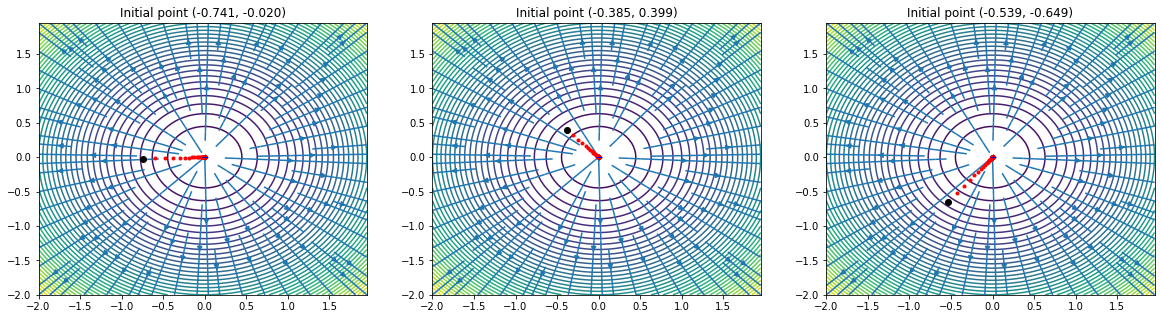

In [5]:
creation(convex1, grad_desc, 0.1, 100)

We test the algorithm setting $\alpha$ = 0.1, and plot the contour graph of the function with the path the gradient descent follows. The initial point is represented with a black dot, each step is represented with a red dot, and the minimum is represented with a blue cross.

We tested the algorithm with three different X0 starting points generated randomly to demonstrate that no matter what the starting point is we always converge to the minimum. 

It is clear from the result that the minimum is zero with all of the three random x0 merging to zero as the minimum. 

We then tested the same algorithm but with 1,000 iterations instead of 100. This resulted in a solution closer to zero compared to the one achieved above for 100 indicating that the more iterations that are tested the closer the solution arrives to the minimum.

solution : -0.00000000000000000000, 0.00000000000000000000
solution : 0.00000000000000000000, 0.00000000000000000000
solution : 0.00000000000000000000, 0.00000000000000000000


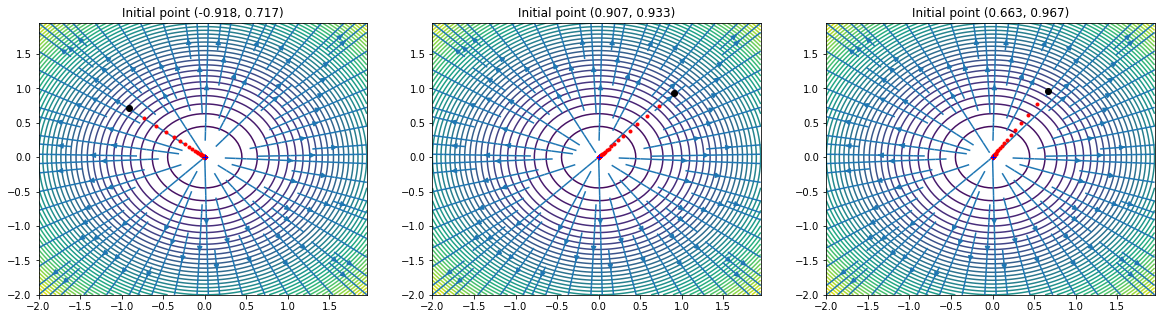

In [6]:
creation(convex1, grad_desc, 0.1, 1000)

However it should be noted that the difference is not significant and hence it is not necessary to perform 1,000 iterations. In fact if we add a precision of 0.0001 we get convergence after just 25 steps. 

Next we test adjusting the value of $\alpha=1$

solution : -0.42895726173774351153, -0.34003476439564295219
solution : 1.34812193051478246275, -1.04245979820474610200
solution : -0.28344810380687324169, 0.51785710668741469220


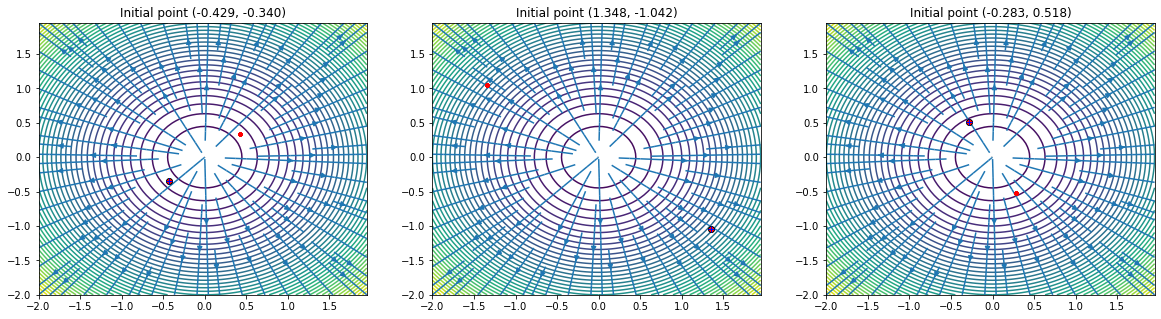

In [134]:
creation(convex1, grad_desc, 1, 100)

This time, we do not get convergence. This situation is very interesing, because the inverse of any gradient vectors in this case can be represented with a line whose middle is precisely the minimum of the function. That's the reason why, by having $\alpha$ = 1, the x is only going from one extremity of this line to the other, without having the possibility to reach the middle.<br>

We can now try with a value really close to 1, with a value of 0.95

solution : 0.00000108238589680555, -0.00001544774572041944
solution : 0.00002588825384716966, -0.00003389173483902236
solution : -0.00002866007602803241, -0.00000905578974550265


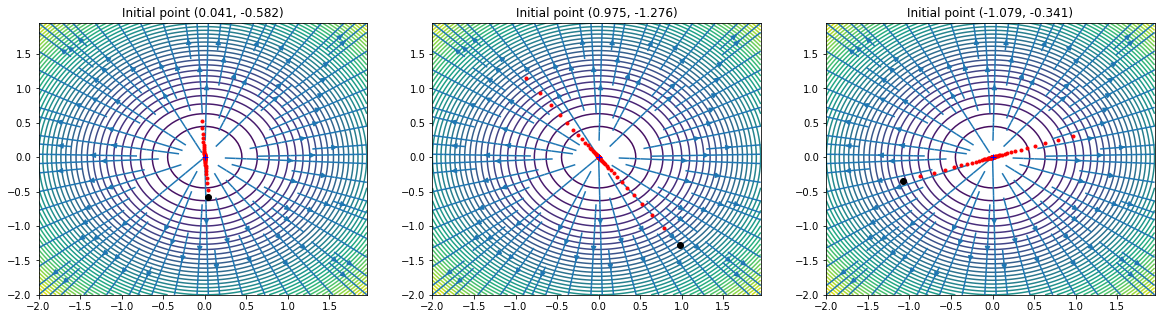

In [135]:
creation(convex1, grad_desc, 0.95, 100)

In this case, we can see that the algorithm achieves the goal of converging to the minimum, but this is not efficient since it always exceeds the solution and has to go back and forth, each time getting a little bit closer, until reaching the minimum.<br>
Finally, we can try the algorithm with $\alpha$ = 2 :

solution : -850640168301.57934570312500000000, 730084295581.44042968750000000000
solution : 1158074940145.32763671875000000000, -1277174084711.28662109375000000000
solution : 1107952295802.95263671875000000000, -311394549148.07104492187500000000


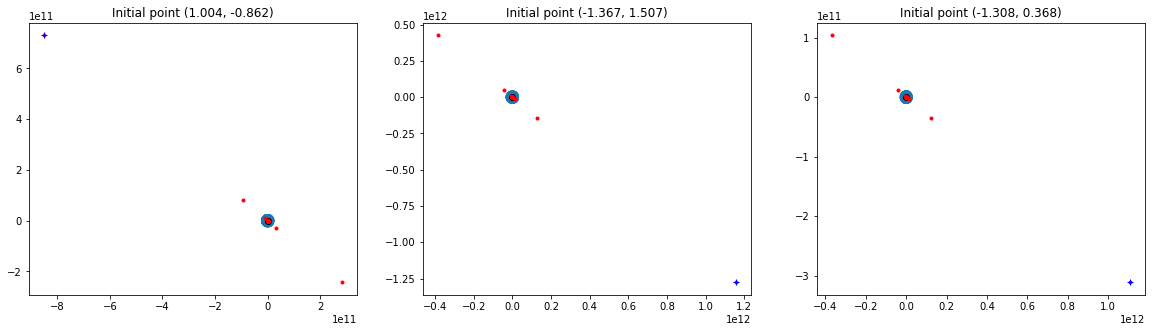

In [136]:
creation(convex1, grad_desc, 2, 25)

As we could expect, with $\alpha$ > 1, it as totally impossible for the algorithm to converge to the minimum, because it is always moving away from it. This is the reason why the result we obtain at the end has no sense. <br>
We can see then that is it necessary to have : 0 < $\alpha$ < 1. 

#### 1.2. A more complex function
We are now working on a more complex function. As for the precedent one, we create the corresponding function. But this time, it returns an array with three elements : 
    1) the function itself
    2) an array representing the gradient 
    3) an array representing the hassian matrix
    
    
It is absolutely not possible to guess which minima of this function are going to be found, as the minima will depend on the starting point. 

In [7]:
def function_x(x):
    X=x[0]
    Y=x[1]
    func = (X**2)*(4-(2.1*(X**2))+(1/3)*(X**4))+X*Y+(Y**2)*(-4+4*(Y**2))
    
    gradx = 2*X**5 - 8.4*X**3 + 8*X + Y
    grady = X + 16*Y**3 - 8*Y
    grad = [gradx, grady]
    
    hess11 = 10*X**4-25.2*X**2+8
    hess12 = 1
    hess22 = 48*Y**2-8
    hess21 = 1
    hess = [[hess11,hess12],[hess21,hess22]]
    
    return[func, grad, hess]

##### 1) Iterations
We begin with the simple algorithm, with only 100 iterations.

solution : 0.08984201310031807164, -0.71265640302073951506
solution : 0.08984201310031807164, -0.71265640302073951506
solution : 0.08984201310031804388, -0.71265640302073973711


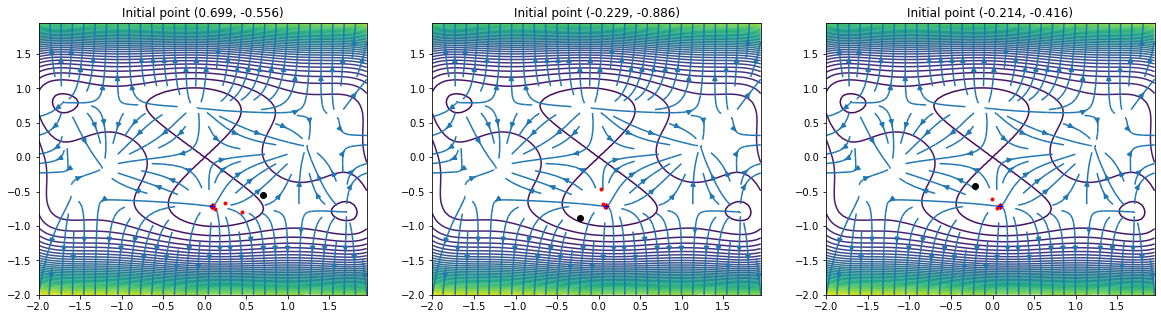

In [15]:
creation(function_x, grad_desc, 0.1, 100)

We can see here that the algorithm perfectly works, and each time the minimum which is found is located in the same valley as the original x. 

##### 2) Criterions

Now, we will create a new algorithm which will stop depending on some criterion. We decide here to write not only the solution, but also the number of iterations needed.

In [12]:
def grad_desc_criterion(x, fig, alpha, iters, function):

    fig.set_title("Initial point (%.3f, %.3f)" % (x[0], x[1]))
    fig.plot(*x, 'ko')
    
    f0 = function(x)
    
    for i in range(iters):
        grad = function(x)[1]
        x1 = x - alpha * np.array(grad)
        f = function(x1)
        while (f>f0): 
            alpha = alpha/2
            x1 = x - alpha * np.array(grad)
            f = function(x1)
        f0=f  
        distance = ((x[0]-x[1])**2+(x1[0]-x1[1])**2)**(1/2)
        x=x1
        fig.plot(*x, 'r.')
        if(np.abs(distance) < 10e-3) | (np.linalg.norm(grad) < 10e-5):
            print("number of points : %i"%i)
            print("solution : %.3f, %.3f"%(x[0],x[1]))
            break
    fig.plot(*x, 'b+')
    
    return fig

number of points : 14
solution : 0.090, -0.713
number of points : 13
solution : 0.090, -0.713
number of points : 14
solution : 0.090, -0.713


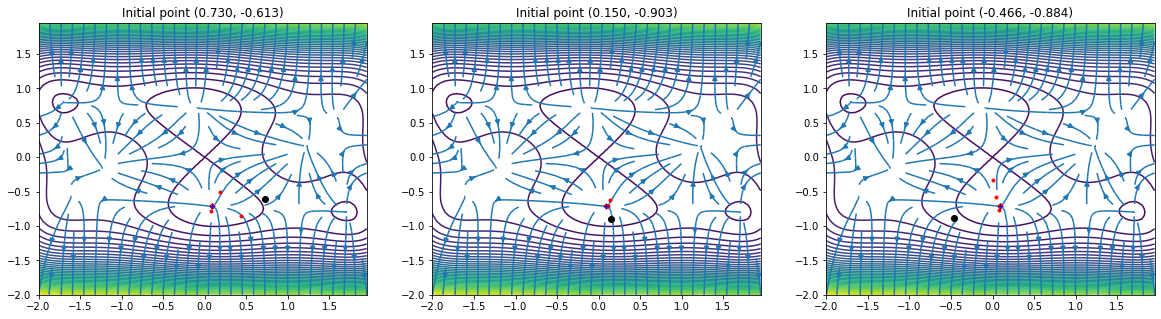

In [13]:
creation(function_x, grad_desc_criterion, 1, 1000)

The backtracking algorithm proves to be more efficient at finding the minimum with 13 iterations needed compared to 25 iterations in the previous algorithm in step 1.1. Hence we see also that the backtracking algorithm did not need 100 iterations to converge to the minimum based on the converge criteria.<br>
We can also notice that the minimum found doesn't always belong to the same valley as the initial point, whereas it was the case when we used iterations instead of criterions. This can be explain because of the fact that the first alpha value is 1, which is high and can allow the system to move far from the initial point. 

#### 1.3. The Rosenbrock function

In [16]:
def rosenbrock(x):
    X=x[0]
    Y=x[1]
    a=1
    b=100
    func = (a-X)**2 + b*((Y-X**2)**2)
    
    gradx = -2+2*X-400*X*Y+400*X**3
    grady = 200*Y-200*X**2
    grad = [gradx, grady]
    
    hess11 = 2+1200*X**2-400*Y
    hess12 = -400*X
    hess21 = -400*X
    hess22 = 200
    hess = [[hess11,hess12],[hess21,hess22]]
    
    return[func, grad, hess]

number of points : 4443
solution : 0.993, 0.986
number of points : 4443
solution : 0.993, 0.986
number of points : 1154
solution : -0.005, 0.000


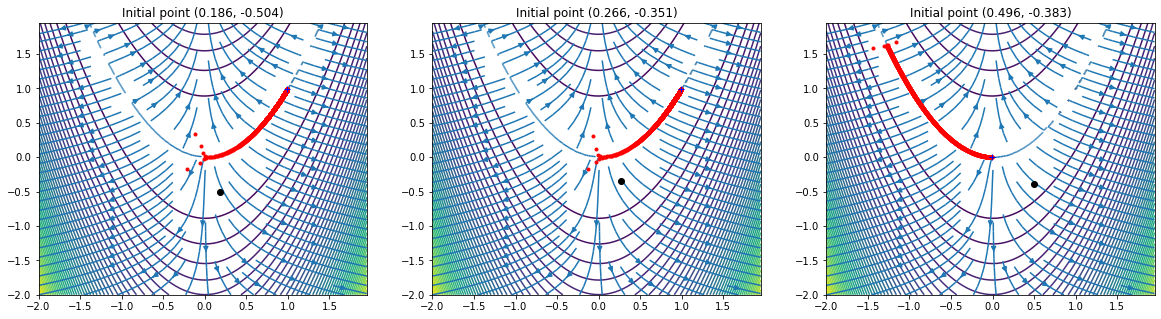

In [17]:
creation(rosenbrock,grad_desc_criterion, 1, 10000)

As expected the minimum for Rosenbrock function is not found efficiently, with 9-10 thousand iterations needed. It converges to the correct at (1,1). 

### 2. Newton descent method
#### 2.1. A simple quadratic function
##### 1) Gradient descent algorithm

In [18]:
def convex2(x):
    func = 200*x[0]**2+x[1]**2
    grad = [200*x[0], 2*x[1]]
    hess = np.array([[200,0],[0,2]])
    return[func, grad, hess]

number of points : 301
solution : 0.000, 0.007
number of points : 251
solution : -0.000, -0.007
number of points : 287
solution : 0.000, -0.007


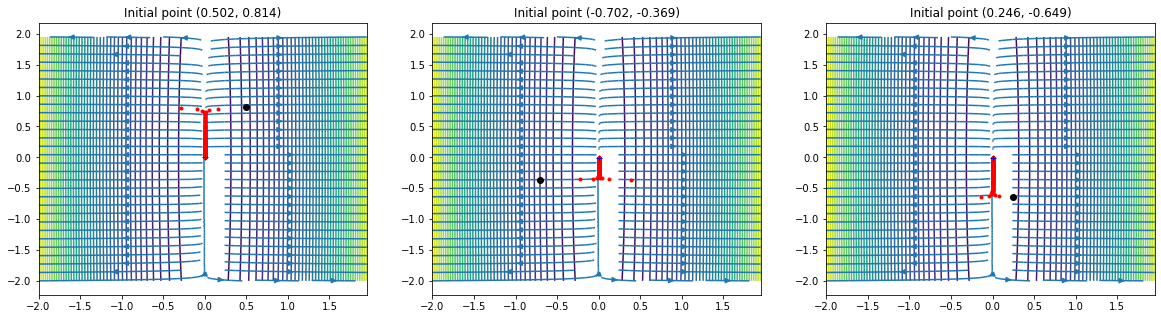

In [19]:
creation(convex2,grad_desc_criterion, 1, 10000)

##### 2) Newton descent algorithm

In [20]:
def newton(x, fig, alpha, iters, function):

    fig.set_title("Initial point (%.3f, %.3f)" % (x[0], x[1]))
    fig.plot(*x, 'ko')
    
    for i in range(iters):
        
        grad = np.array(function(x)[1])
        hessMatrix = np.array(function(x)[2])
        
        
        #check if Hessian Matrix is definite positive
        positive = np.all(np.linalg.eigvals(hessMatrix) > 0)
        
        if positive:
            x1 = x - alpha * np.linalg.solve(hessMatrix,grad)
        else:
            x1 = x - alpha * grad
        
        #backtracking for alpha
        f0 = function(x)[0]
        f = function(x1)[0]
        while (f>f0): 
            alpha = alpha/2
            if positive:
                x1 = x - alpha * np.linalg.solve(hessMatrix,grad)
            else:
                x1 = x - alpha * grad
            f = function(x1)[0]
        f0=f
        
        #stop criterion 
        distance = ((x[0]-x[1])**2+(x1[0]-x1[1])**2)**(1/2)
        x=x1
                          
        if positive:
            fig.plot(*x, 'g.') 
        else:
            fig.plot(*x, 'r.') 
           
        #if(np.abs(distance) < 10e-3) | (np.linalg.norm(grad) < 10e-5):
        if(np.linalg.norm(grad) < 10e-5):
            break
            
    print("number of iterations : %i"%i)
    print("solution : %.3f, %.3f"%(x[0],x[1]))
    fig.plot(*x, 'b+')
    
    return fig

number of iterations : 1
solution : 0.000, 0.000
number of iterations : 1
solution : 0.000, 0.000
number of iterations : 1
solution : 0.000, 0.000


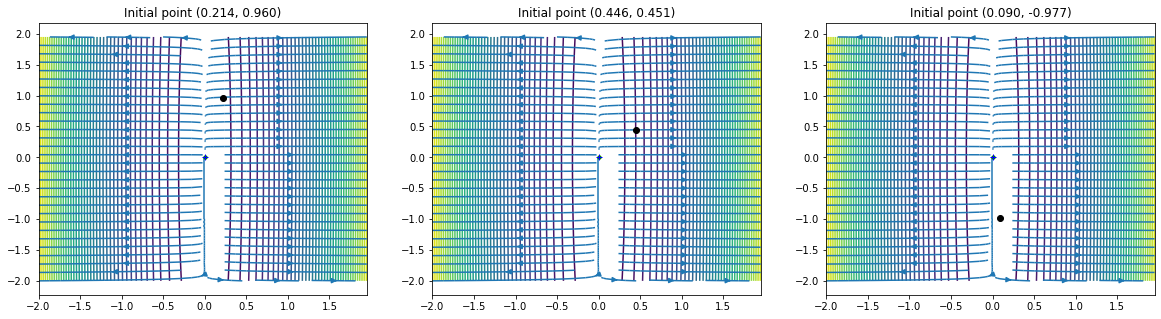

In [21]:
creation(convex2,newton, 1, 10000)

We observe that the Newton Method is more efficient at finding the minimum for a convex function compared to that of the gradient descent. To minmise the function with gradient descent required 400-500 iterations, while Newtons Method required just one.

#### 2.2. A more complicated function
##### 1) Gradient descent algorithm
already did that : 1.2.2

##### 2) Newton - Gradient descent algorithm

number of iterations : 41
solution : 0.090, -0.713
number of iterations : 4
solution : 0.090, -0.713
number of iterations : 99
solution : -1.704, 0.796


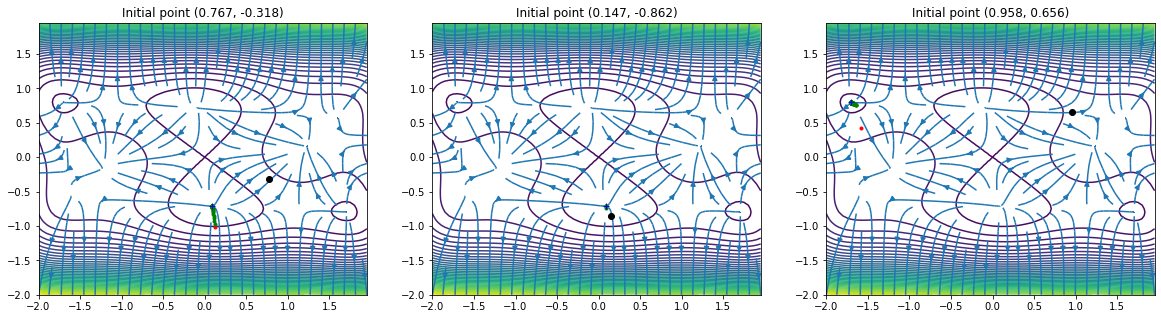

In [22]:
creation(function_x, newton, 1, 100)

#### 2.3. Rosenbrock function


number of iterations : 59
solution : 1.000, 1.000
number of iterations : 21
solution : 1.000, 1.000
number of iterations : 46
solution : 1.000, 1.000


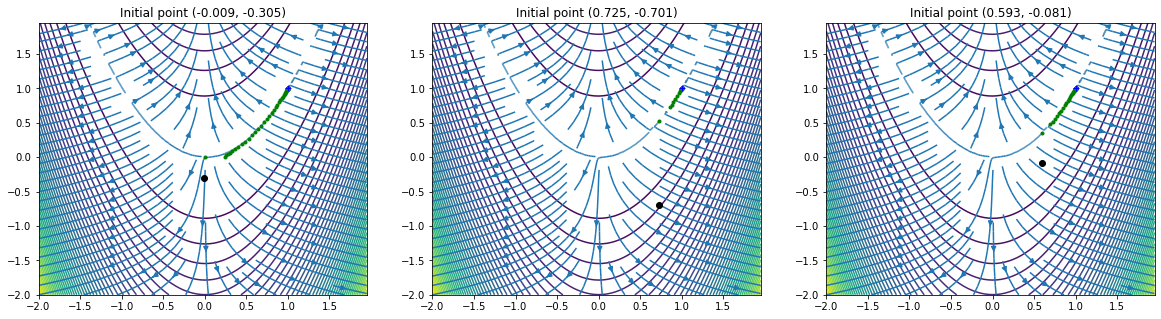

In [23]:
creation(rosenbrock, newton, 1, 1000)

We can see that the system uses the gradient descent first, in order to find a valley. Then, it uses the Newton descent. 